## Problem Description 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Data Description: 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary:

*   RowNumber: Row number
*   CustomerId: Unique identification key for different customers.
*   Surname: Surname of the customer
*   Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
*   Geography: The country to which the customer belongs.
*   Gender: The gender of the customer.
*   Age: Age of the customer.
*   Tenure: The period of time a customer has been associated with the bank.
*   Balance: The account balance (the amount of money deposited in the bank account) of the customer.
*   NumOfProducts: How many accounts, bank account affiliated products the person has.
*   HasCrCard: Does the customer have a credit card through the bank?
*   IsActiveMember: Subjective, but for the concept
*   EstimatedSalary: Estimated salary of the customer.
*   Exited: Did they leave the bank after all?





In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import sys
import os

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers

In [4]:
df_bank = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/AIML_DataFiles/bank.csv')

In [5]:
df_bank.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
## Rownumber can be dropped since this is just a index. Name can be also dropped since while building model, name is not 
## going to contribute and if the identification is required down the line then customer ID can be used to identify
df_bank.drop(['RowNumber','Surname'],axis=1,inplace=True)

In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Exploratry Data Analysis ( EDA ) 

In [8]:
df_bank.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### None of the fields is having null values. 

In [9]:
## Check on the unique values present in where datatype is of object type

for ind in df_bank.dtypes[df_bank.dtypes == "object"].index.values:
    print('Unique value for the feature <%s> is %s'%(ind,df_bank[ind].unique()))

Unique value for the feature <Geography> is ['France' 'Spain' 'Germany']
Unique value for the feature <Gender> is ['Female' 'Male']


### Data Insight
Geography and Gender are the two features where  label oding should be applied 

In [10]:
## Lets convert feature Geography and Gender into categorical variable
df_bank['Gender'] = df_bank['Gender'].astype('category')
df_bank['Geography'] = df_bank['Geography'].astype('category')

In [11]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  category
 3   Gender           10000 non-null  category
 4   Age              10000 non-null  int64   
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  int64   
 9   IsActiveMember   10000 non-null  int64   
 10  EstimatedSalary  10000 non-null  float64 
 11  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(8)
memory usage: 801.1 KB


In [12]:
df_custID = pd.DataFrame([df_bank.groupby('CustomerId').size() > 1]).T
df_custID[df_custID[0] == True]

,0
CustomerId,


#### There is no duplicate Customer ID in the dataset and now customer ID from the data set can be dropped

In [13]:
### Drop CustomerID from the dataset
df_bank.drop(['CustomerId'],axis=1,inplace=True)

### Feature Elimination 
As part of feature elimination process, below are the feature which has been eliminated from the dataset 


1.   CustomerId
2.   RowNumber
3.   Surname



### Univariate Analysis for the attribute which are continious variable

int64


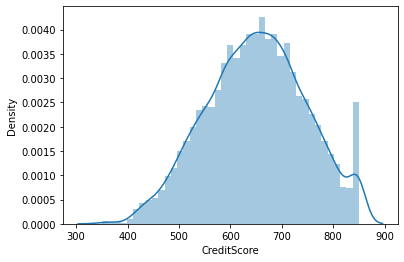

category
category
int64


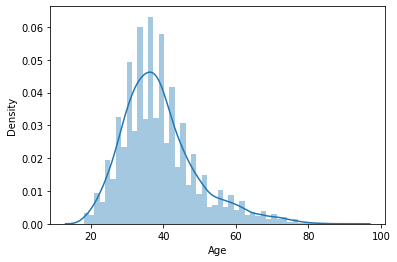

int64


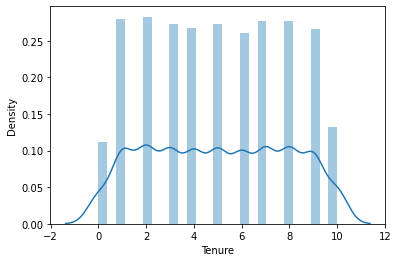

float64


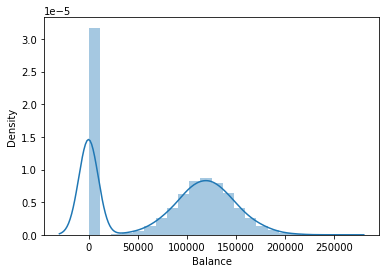

int64


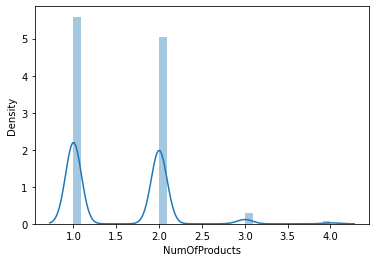

int64


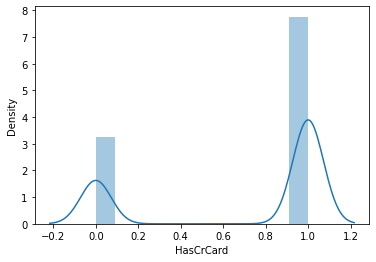

int64


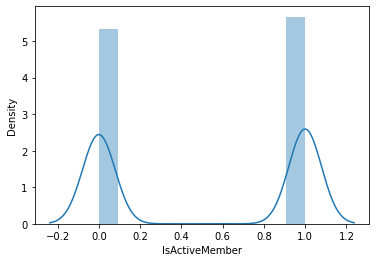

float64


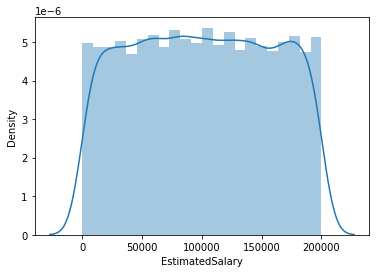

int64


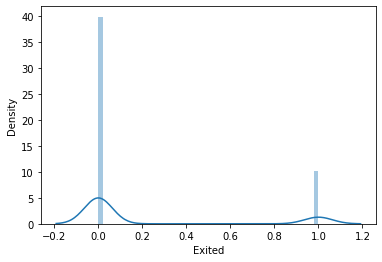

In [14]:
for ind in df_bank.columns.values:
    print(df_bank[ind].dtypes)
    if df_bank[ind].dtypes in ('int64','float64'):
        sns.distplot(df_bank[ind])
        plt.show()
    

#### Get the counts for some of the variables which seems categorical variable

In [15]:
### Describe the dataframe to find out quartile, min and max value
df_bank.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Data Insight
1. There is great difference between 3rd Quartile and max value for the attribute "Balance" and "Estimated Salary" indicating outliers in the data. Same is indicated when looking at the standard deviation. 

2. The data needs to be normalized as there the metrics for each attribute is different as suggested by the value for each of the fields.Also, Neural Networks peforms great on the normalized set of data. 





In [16]:
df_bank.groupby('Exited').size()

Exited
0    7963
1    2037
dtype: int64

### Customer who have exited is under-sampled as compared to customer who do not exited

### Bivariate analysis

#### Bivariate analysis against the target variable "Exited"

In [17]:
df_bank.groupby(['Geography','Exited']).size()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
dtype: int64

In [18]:
df_bank.groupby(['Gender','Exited']).size()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
dtype: int64

In [19]:
df_bank.groupby(['HasCrCard','Exited']).size()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
dtype: int64

In [20]:
df_bank.groupby(['IsActiveMember','Exited']).size()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
dtype: int64

In [21]:
df_bank.groupby(['NumOfProducts','Exited']).size()

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4242
               1          348
3              0           46
               1          220
4              1           60
dtype: int64

In [22]:
df_bank.groupby('Exited')[['Balance','EstimatedSalary']].mean()

,Balance,EstimatedSalary
Exited,,
0,72745.296779,99738.391772
1,91108.539337,101465.677531


### Data Insight 
1. Customer who exited has the higher average Balance as compare to customer who have not exited

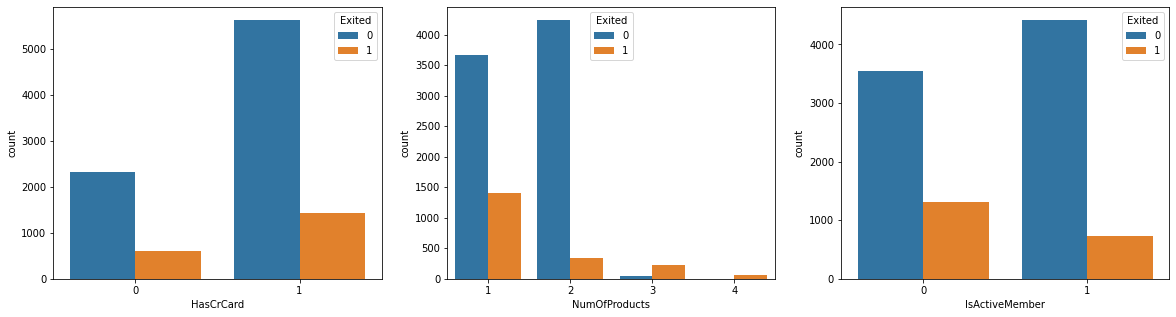

In [23]:
_, plt_ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 5))
sns.countplot(x = "HasCrCard", hue="Exited", data = df_bank, ax = plt_ax[0]);
sns.countplot(x = "NumOfProducts", hue="Exited", data = df_bank, ax = plt_ax[1]);
sns.countplot(x = "IsActiveMember", hue="Exited", data = df_bank, ax = plt_ax[2]);


#### Data Insight 1
1. Customer having credit card likely to exit more as compare to customer not having credit card

2. Customer having three to four product is having high exit rate as compared to customer having 1 to 2 product

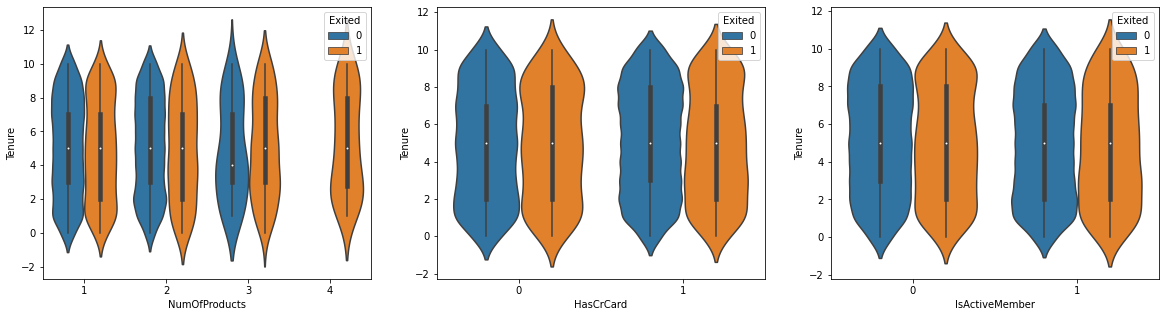

In [24]:
_, plt_ax = plt.subplots(1, 3, figsize=(20, 5))
sns.violinplot(x = "NumOfProducts", y = "Tenure", hue="Exited", data = df_bank, ax= plt_ax[0])
sns.violinplot(x = "HasCrCard", y = "Tenure", data = df_bank, hue="Exited", ax = plt_ax[1])
sns.violinplot(x = "IsActiveMember", y = "Tenure", hue="Exited", data = df_bank, ax = plt_ax[2])

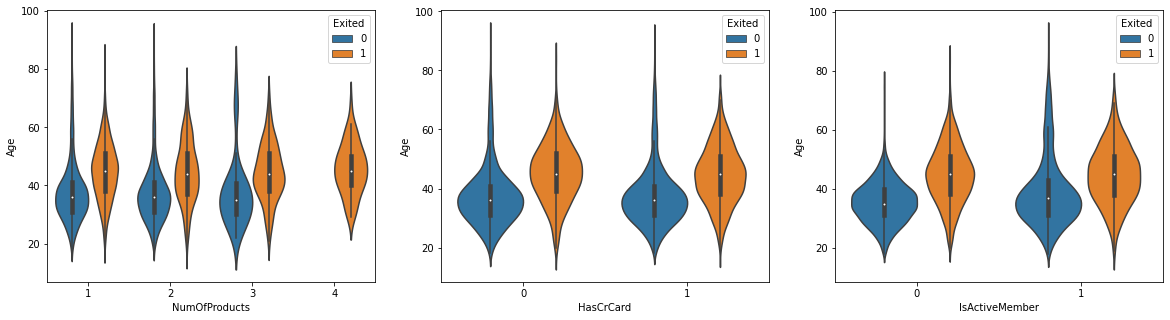

In [25]:
_, plt_ax = plt.subplots(1, 3, figsize=(20, 5))
sns.violinplot(x = "NumOfProducts", y = "Age", hue="Exited", data = df_bank, ax= plt_ax[0])
sns.violinplot(x = "HasCrCard", y = "Age", data = df_bank, hue="Exited", ax = plt_ax[1])
sns.violinplot(x = "IsActiveMember", y = "Age", hue="Exited", data = df_bank, ax = plt_ax[2])

In [26]:
#### Bin the Credit Score, Age, Balance and Estimated Salary
Credit_Scr_bin = [300,560,650,700,750,875]
Credit_Label = ['Very Bad','Bad','Fair','Good','Excellent']

df_bank['CreditScore_Bin'] = pd.cut(df_bank['CreditScore'],bins=Credit_Scr_bin,labels=Credit_Label)

In [27]:
df_bank[df_bank['CreditScore_Bin'].isnull()]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Bin


In [28]:
df_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Bin
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Bad
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Bad
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Very Bad
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Fair
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


In [29]:
#### Bin the Credit Score, Age, Balance and Estimated Salary

Age_bin = [0,18,30,45,60,75,95]
Age_Label = ['0-18','19-30','30-45','46-60','61-75','76-99']

df_bank['Age_Bins'] = pd.cut(df_bank['Age'],bins=Age_bin,labels=Age_Label)
df_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Bin,Age_Bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Bad,30-45
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Bad,30-45
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Very Bad,30-45
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Fair,30-45
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent,30-45


In [30]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  CreditScore_Bin  10000 non-null  category
 12  Age_Bins         10000 non-null  category
dtypes: category(4), float64(2), int64(7)
memory usage: 742.9 KB


In [31]:
df_bank.groupby(['CreditScore_Bin','Exited']).size()

CreditScore_Bin  Exited
Very Bad         0         1453
                 1          423
Bad              0         2427
                 1          634
Fair             0         1586
                 1          361
Good             0         1212
                 1          306
Excellent        0         1285
                 1          313
dtype: int64

In [32]:
df_bank.groupby(['Age_Bins','Exited']).size()

Age_Bins  Exited
0-18      0           20
          1            2
19-30     0         1800
          1          146
30-45     0         4989
          1          932
46-60     0          805
          1          842
61-75     0          305
          1          114
76-99     0           44
          1            1
dtype: int64

In [33]:
encoder = LabelEncoder()
df_bank["Lbl_Geography"] = encoder.fit_transform(df_bank["Geography"])
df_bank["Lbl_Gender"] = encoder.fit_transform(df_bank["Gender"])

In [34]:
df_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Bin,Age_Bins,Lbl_Geography,Lbl_Gender
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Bad,30-45,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Bad,30-45,2,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Very Bad,30-45,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Fair,30-45,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent,30-45,2,0


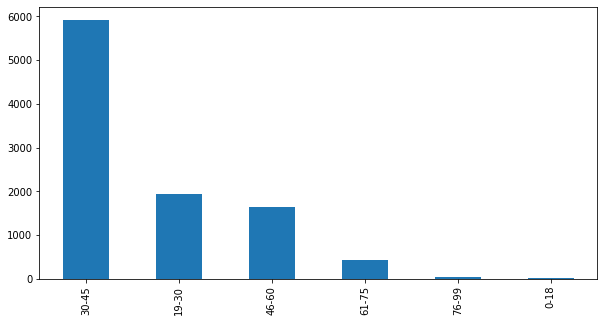

In [35]:
df_bank["Age_Bins"].value_counts().plot.bar(figsize=(10,5))

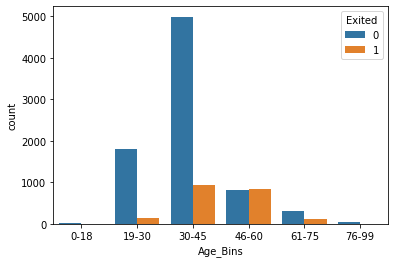

In [36]:
sns.countplot(x="Age_Bins",hue="Exited",data=df_bank);

#### Data Insight 2
Customer who are in the age group of 46 to 60 has higher probability to get exited more as compared to other age group customer

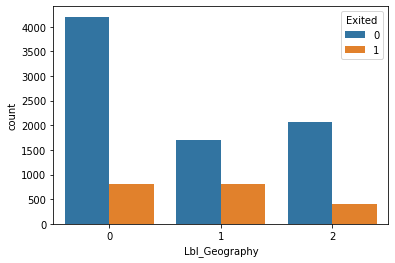

In [37]:
sns.countplot(x="Lbl_Geography",hue="Exited",data=df_bank);

#### Data Insight 3

Customer who is part of Germany is likely to exit more as compared to other geography

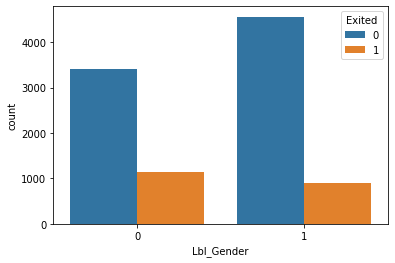

In [38]:
sns.countplot(x="Lbl_Gender",hue="Exited",data=df_bank);

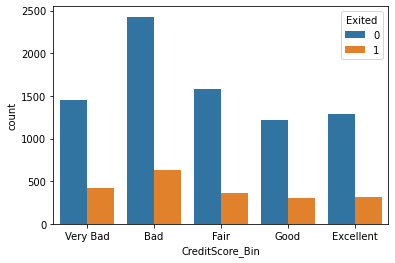

In [39]:
sns.countplot(x="CreditScore_Bin",hue="Exited",data=df_bank);

In [40]:
df_bank_upd = df_bank.drop(['CreditScore','Gender','Geography','Age'],axis=1)

In [41]:
df_bank_upd.head()


,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Bin,Age_Bins,Lbl_Geography,Lbl_Gender
0,2,0.00,1,1,1,101348.88,1,Bad,30-45,0,0
1,1,83807.86,1,0,1,112542.58,0,Bad,30-45,2,0
2,8,159660.80,3,1,0,113931.57,1,Very Bad,30-45,0,0
3,1,0.00,2,0,0,93826.63,0,Fair,30-45,0,0
4,2,125510.82,1,1,1,79084.10,0,Excellent,30-45,2,0


In [42]:
CreditScore_Lbl = {'Very Bad':0,'Bad':1,'Fair':'2','Good':3,'Excellent':4}
df_bank_upd['Lvl_CreditScore'] = df_bank_upd['CreditScore_Bin'].replace(CreditScore_Lbl)

In [43]:
df_bank_upd["Lbl_Age"] = encoder.fit_transform(df_bank["Age_Bins"])


In [44]:
df_bank_upd.head()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Bin,Age_Bins,Lbl_Geography,Lbl_Gender,Lvl_CreditScore,Lbl_Age
0,2,0.00,1,1,1,101348.88,1,Bad,30-45,0,0,1,2
1,1,83807.86,1,0,1,112542.58,0,Bad,30-45,2,0,1,2
2,8,159660.80,3,1,0,113931.57,1,Very Bad,30-45,0,0,0,2
3,1,0.00,2,0,0,93826.63,0,Fair,30-45,0,0,2,2
4,2,125510.82,1,1,1,79084.10,0,Excellent,30-45,2,0,4,2


In [45]:
df_bank_final = df_bank_upd.drop(['CreditScore_Bin','Age_Bins'],axis=1)

In [46]:
df_bank_final = df_bank_final[['Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Lbl_Geography','Lbl_Gender','Lvl_CreditScore','Lbl_Age','Exited']]

In [47]:
df_bank_final.head()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Lbl_Geography,Lbl_Gender,Lvl_CreditScore,Lbl_Age,Exited
0,2,0.00,1,1,1,101348.88,0,0,1,2,1
1,1,83807.86,1,0,1,112542.58,2,0,1,2,0
2,8,159660.80,3,1,0,113931.57,0,0,0,2,1
3,1,0.00,2,0,0,93826.63,0,0,2,2,0
4,2,125510.82,1,1,1,79084.10,2,0,4,2,0


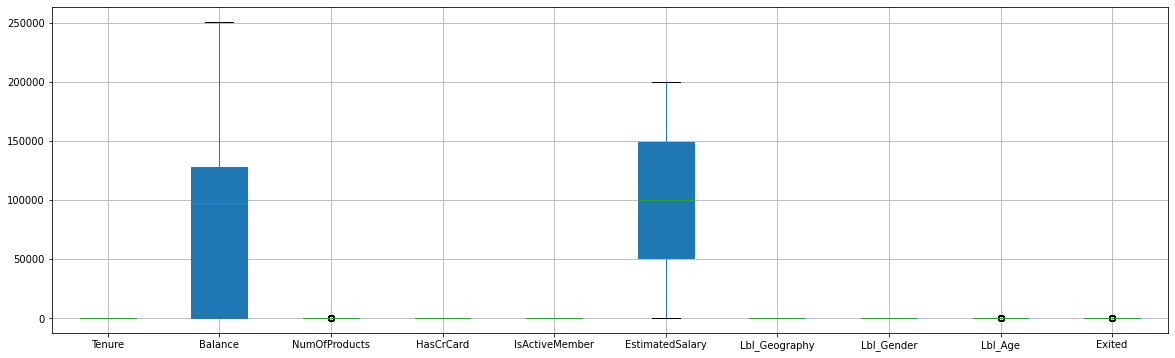

In [48]:
plt.figure(figsize=(20,6))
df_bank_final.boxplot(patch_artist=True)

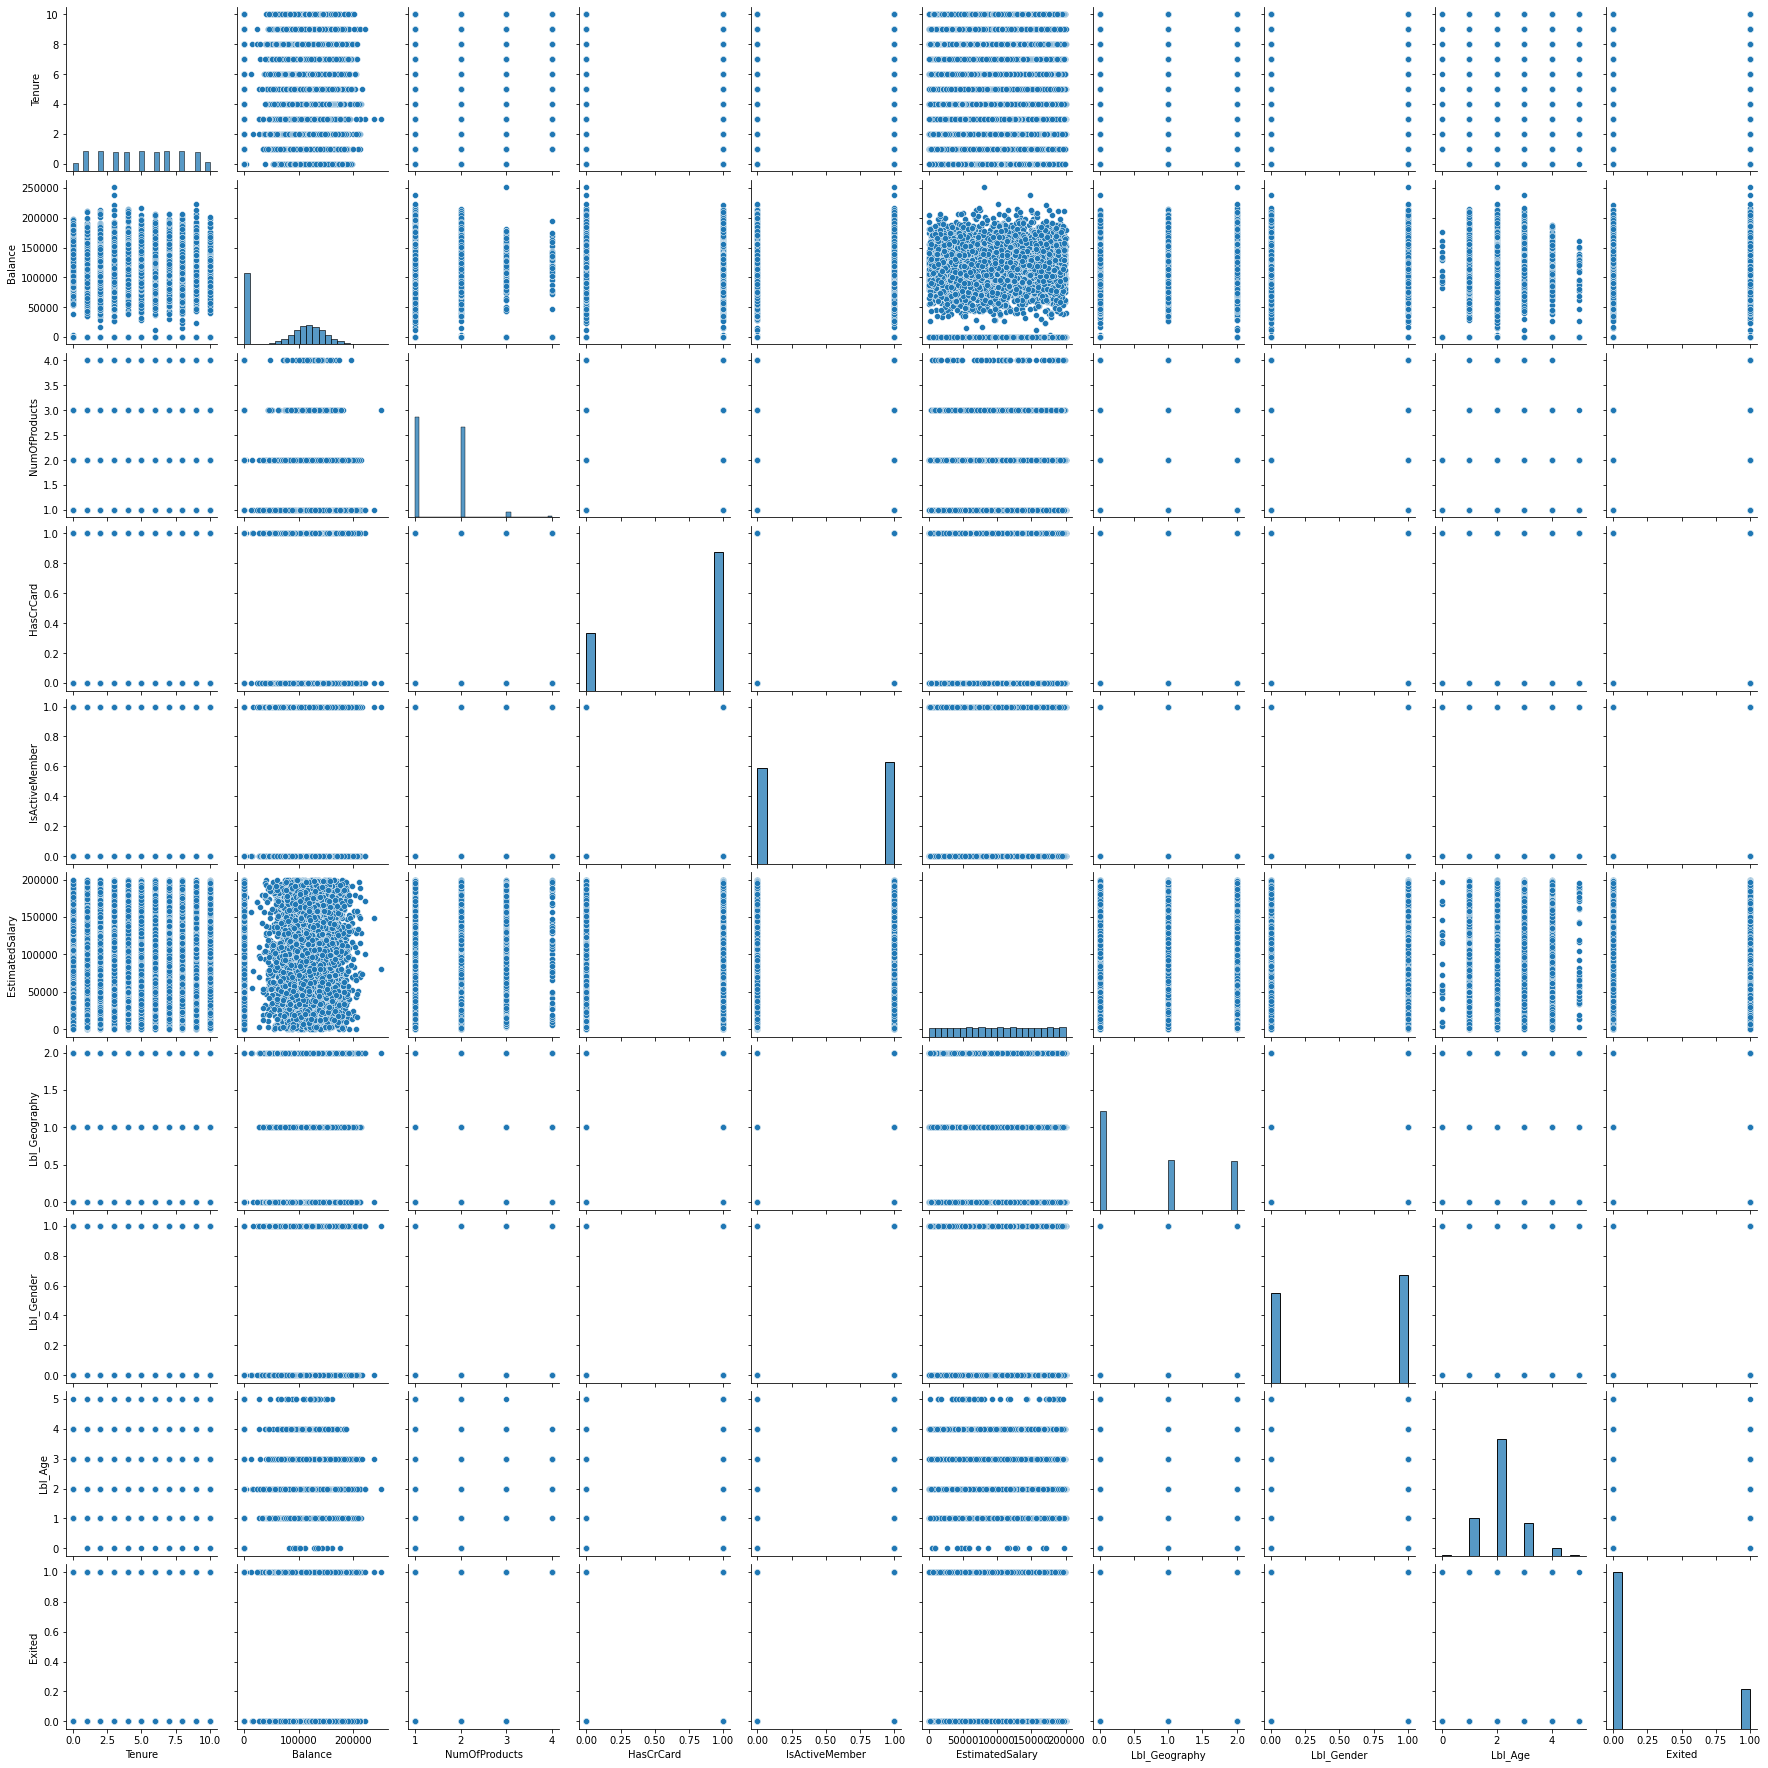

In [49]:
sns.pairplot(df_bank_final)

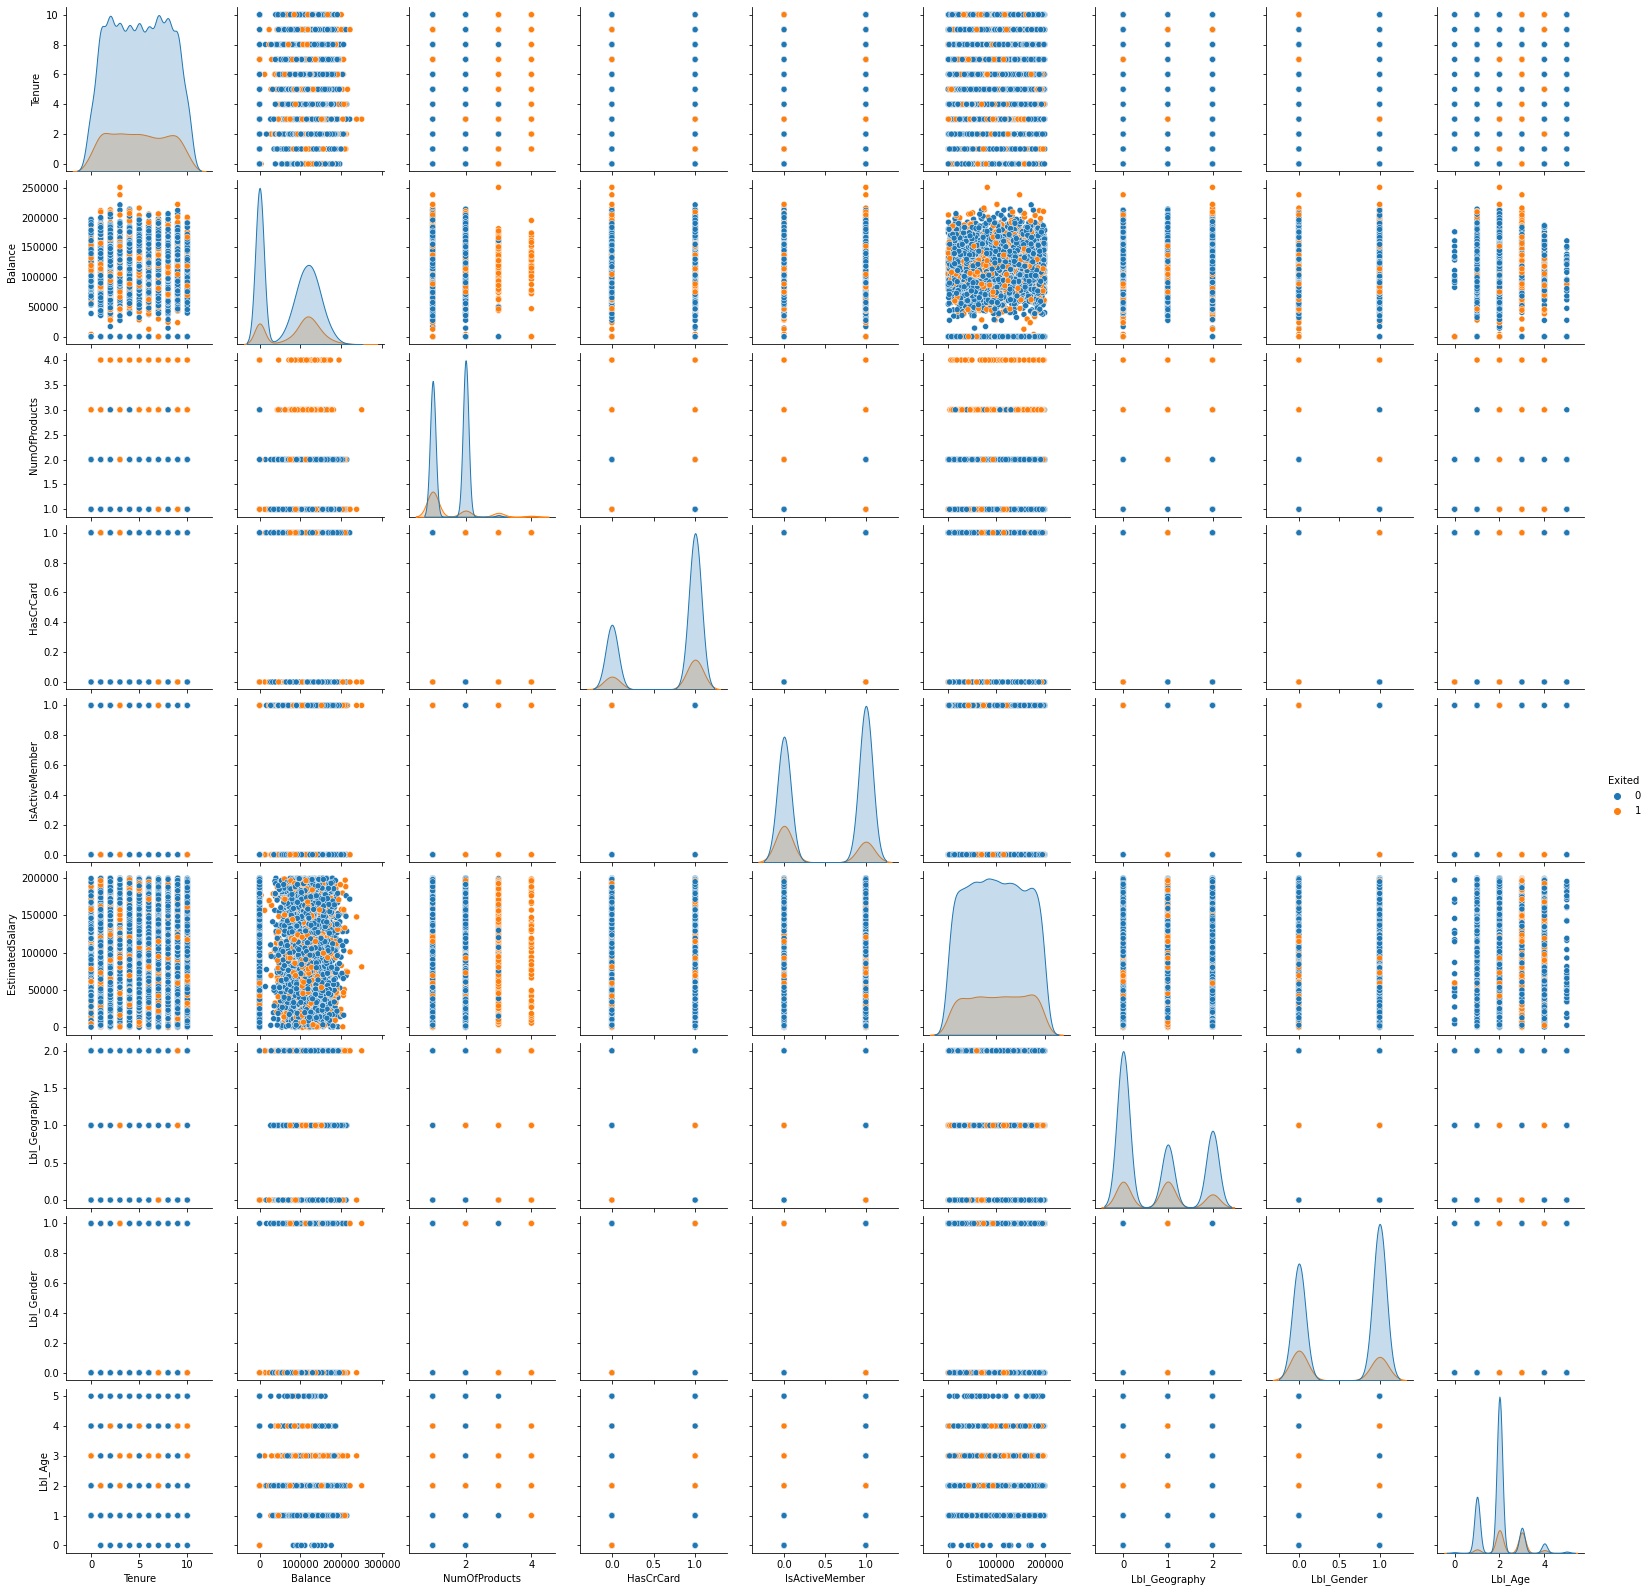

In [50]:
### Pair plot
sns.pairplot(df_bank_final,hue='Exited')

In [51]:
df_bank_final.corr()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Lbl_Geography,Lbl_Gender,Lbl_Age,Exited
Tenure,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,0.003739,0.014733,-0.009831,-0.014001
Balance,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.069408,0.012087,0.028565,0.118533
NumOfProducts,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.003972,-0.021859,-0.035462,-0.047820
HasCrCard,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.008523,0.005766,-0.005935,-0.007138
IsActiveMember,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.006724,0.022544,0.081598,-0.156128
EstimatedSalary,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,-0.001369,-0.008112,-0.007890,0.012097
Lbl_Geography,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,1.000000,0.004719,0.021859,0.035943
Lbl_Gender,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,0.004719,1.000000,-0.025964,-0.106512
Lbl_Age,-0.009831,0.028565,-0.035462,-0.005935,0.081598,-0.007890,0.021859,-0.025964,1.000000,0.260836
Exited,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,0.035943,-0.106512,0.260836,1.000000


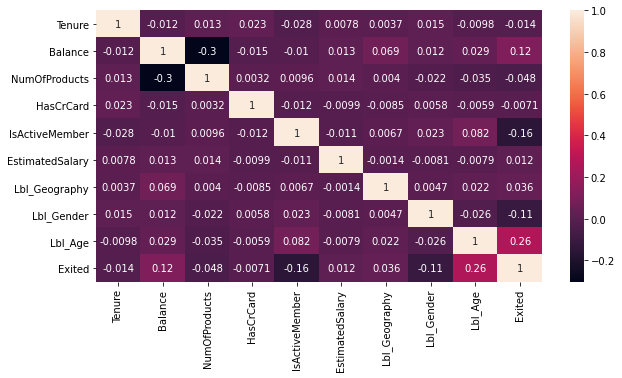

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(df_bank_final.corr(),annot=True)

In [53]:
df_bank_final.head()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Lbl_Geography,Lbl_Gender,Lvl_CreditScore,Lbl_Age,Exited
0,2,0.00,1,1,1,101348.88,0,0,1,2,1
1,1,83807.86,1,0,1,112542.58,2,0,1,2,0
2,8,159660.80,3,1,0,113931.57,0,0,0,2,1
3,1,0.00,2,0,0,93826.63,0,0,2,2,0
4,2,125510.82,1,1,1,79084.10,2,0,4,2,0


In [54]:
X = df_bank_final.drop("Exited", axis=1)
y = df_bank_final["Exited"]

In [55]:
X.head()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Lbl_Geography,Lbl_Gender,Lvl_CreditScore,Lbl_Age
0,2,0.00,1,1,1,101348.88,0,0,1,2
1,1,83807.86,1,0,1,112542.58,2,0,1,2
2,8,159660.80,3,1,0,113931.57,0,0,0,2
3,1,0.00,2,0,0,93826.63,0,0,2,2
4,2,125510.82,1,1,1,79084.10,2,0,4,2


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tenure           10000 non-null  int64  
 1   Balance          10000 non-null  float64
 2   NumOfProducts    10000 non-null  int64  
 3   HasCrCard        10000 non-null  int64  
 4   IsActiveMember   10000 non-null  int64  
 5   EstimatedSalary  10000 non-null  float64
 6   Lbl_Geography    10000 non-null  int64  
 7   Lbl_Gender       10000 non-null  int64  
 8   Lvl_CreditScore  10000 non-null  object 
 9   Lbl_Age          10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [57]:
X[X['Lvl_CreditScore'].isnull()]

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Lbl_Geography,Lbl_Gender,Lvl_CreditScore,Lbl_Age


In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

### Preprocessing - Normalize
Applying the normalization as pre processor on the Independent Features and then creating Artifical Neural Network model

In [59]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train)

In [60]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9
0,0.000054,0.891005,0.000007,0.000007,0.000007,0.453993,0.000007,0.000007,0.000027,0.000020
1,0.000027,0.788747,0.000007,0.000007,0.000007,0.614718,0.000013,0.000000,0.000013,0.000027
2,0.000032,0.000000,0.000011,0.000005,0.000000,1.000000,0.000011,0.000005,0.000005,0.000011
3,0.000016,0.757017,0.000005,0.000000,0.000005,0.653395,0.000011,0.000000,0.000011,0.000011
4,0.000000,0.377664,0.000006,0.000000,0.000006,0.925943,0.000000,0.000006,0.000026,0.000019


In [61]:
X_test = normalize(X_test)

In [62]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9
0,0.000023,0.600846,0.000005,0.000000,0.000005,0.799365,0.000005,0.000000,0.000019,0.000009
1,0.000048,0.000000,0.000006,0.000006,0.000000,1.000000,0.000012,0.000000,0.000018,0.000012
2,0.000000,0.280409,0.000005,0.000005,0.000000,0.959881,0.000010,0.000000,0.000010,0.000010
3,0.000009,0.000000,0.000017,0.000000,0.000000,1.000000,0.000000,0.000009,0.000000,0.000017
4,0.000041,0.745420,0.000006,0.000006,0.000000,0.666595,0.000000,0.000006,0.000018,0.000018


In [63]:
print('X_train shape ',(X_train.shape))
print('X_test shape ',(X_test.shape))

X_train shape  (8000, 10)
X_test shape  (2000, 10)


In [64]:
# X_train_tf = tf.convert_to_tensor(X_train)
# X_test_tf = tf.convert_to_tensor(X_test)
# X_val_tf = tf.convert_to_tensor(X_train)
# y_train_tf =  tf.convert_to_tensor(y_train.values)
# y_test_tf = tf.convert_to_tensor(y_test.values)
# y_val_tf =  tf.convert_to_tensor(y_val.values)

In [65]:
#Initialise the Artificial Neural Network Sequential classifier:
df_bank_mdl_1=Sequential()

In [66]:
#Adding input layer and 1st hidden layer using relu activitation and at the outout applying sigmoid function 
#since the target variable is of binary class
df_bank_mdl_1.add(Dense(input_dim = 10,units=6, activation = 'relu',kernel_initializer="uniform"))
df_bank_mdl_1.add(Dense(6,activation='relu',kernel_initializer="uniform"))
df_bank_mdl_1.add(Dense(1,activation="sigmoid",kernel_initializer="uniform"))
#classifier.add(Dense(input_dim=11, units=5,activation="sigmoid",kernel_initializer="uniform"))

In [67]:
## Applying Adam Optimizer
sgd = optimizers.Adam(lr = 0.001)

In [68]:
#compiling the Artificial Neural Network
df_bank_mdl_1.compile(optimizer=sgd,loss="binary_crossentropy",metrics=['accuracy'])

In [69]:
df_bank_mdl_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [70]:
## Training the model with batch size of 10 and epoch of 100
model_ann=df_bank_mdl_1.fit(X_train,y_train.values,batch_size=10,epochs=100)

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5866 - accuracy: 0.7980
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4961 - accuracy: 0.8019
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5176 - accuracy: 0.7861
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5054 - accuracy: 0.7926
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4959 - accuracy: 0.7991
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4970 - accuracy: 0.7985
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4909 - accuracy: 0.8034
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4907 - accuracy: 0.8035
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4983 - accuracy: 0.7981
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4928 - accura

In [71]:
### Get the predicted value 
y_pred = df_bank_mdl_1.predict(X_test)

### Filter the predicted value where probablity is greater than 50%
y_pred = (y_pred > 0.5)

In [72]:
### Get the confusion matrix and find out Type 1 and Type 2 error 
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[1578,    0],
       [ 422,    0]])

In [73]:
### Get the accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.789

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
Y_pred_cls = df_bank_mdl_1.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(df_bank_mdl_1.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))

63/63 [==============================] - 0s 986us/step - loss: 0.5103 - accuracy: 0.7890
Accuracy Model1 (Dropout): 0.7889999747276306
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


### Data Insight 
1. Model accuracy is near to 79% but true negative and false postive value is 0 which will be impacting F1 score. In order to improve the F1 and accuracy score instead of using the normalization function, lets use the standard scaler function to find out if there is improvement in the matrix

In [75]:
X_train_std,X_test_std,y_train_std,y_test_std=train_test_split(X,y,test_size=0.2,random_state=10)

### Preprocessing - StandardScaler
Applying StandardScaler as pre processor on the Independent Features and then creating Artifical Neural Network model

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_std)
X_test_std = sc.transform(X_test_std)

In [77]:
df_bank_mdl_std = Sequential()
# Adding the input layer and the first hidden layer
df_bank_mdl_std.add(Dense(input_dim = 10,units=6, activation = 'relu',kernel_initializer="uniform"))
# Adding the second hidden layer
df_bank_mdl_std.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
df_bank_mdl_std.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
df_bank_mdl_std.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
df_bank_mdl_std.fit(X_train_std, y_train_std.values, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5610 - accuracy: 0.7985
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4556 - accuracy: 0.7884
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4377 - accuracy: 0.7975
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4250 - accuracy: 0.8087
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4173 - accuracy: 0.8271
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4142 - accuracy: 0.8307
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4175 - accuracy: 0.8345
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4192 - accuracy: 0.8277
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4286 - accuracy: 0.8290
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4286 - accura

In [78]:
y_pred_std = df_bank_mdl_std.predict(X_test_std)
y_pred_std = (y_pred_std > 0.5)

In [79]:
## Confusion Matrix Stamdard Scaler
from sklearn.metrics import confusion_matrix
cm_std = confusion_matrix(y_test_std, y_pred_std)
cm_std

array([[1526,   52],
       [ 301,  121]])

In [80]:
## Accuracy Score
accuracy_score(y_test_std,y_pred_std)

0.8235

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
Y_pred_cls_std = df_bank_mdl_std.predict_classes(X_test_std, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(df_bank_mdl_std.evaluate(X_test_std,y_test_std.values)[1]))
print('Recall_score: ' + str(recall_score(y_test_std.values,Y_pred_cls_std)))
print('Precision_score: ' + str(precision_score(y_test_std.values, Y_pred_cls_std)))
print('F-score: ' + str(f1_score(y_test_std.values,Y_pred_cls_std)))

63/63 [==============================] - 0s 965us/step - loss: 0.4361 - accuracy: 0.8235
Accuracy Model1 (Dropout): 0.8234999775886536
Recall_score: 0.28672985781990523
Precision_score: 0.6994219653179191
F-score: 0.4067226890756303


## Data Insight 
Comparision of Normalization vs Standard Scaler Model

| Metrics    |  Preprocessing-Normalization | Preprocessing-Standard Scaler|
|------------|------------------------------|------------------------------|
|Accuracy    |   78.9                       | 82.4                         |
| Recall     |   0                          | 28.9                         |
| Precision  |   0                          | 70.11                        |
| F-Score    |   0                          | 40.94                        |

